# 第一节 相关分析

## 实验6-1 计算协方差

In [1]:
import numpy as np
import pandas as pd 

In [2]:
index_df = pd.read_excel('6-1.xlsx', index_col=0) # 注意索引
index_df

,DJIA,SPX
Date,,
1,7715,942
2,7442,915
3,7581,928
4,7572,928
5,7881,963
6,7823,955
7,8149,984
8,7838,953
9,7756,947


In [3]:
# 无偏估计
index_df.cov()

,DJIA,SPX
DJIA,38937.377778,3917.155556
SPX,3917.155556,397.877778


In [4]:
# 有偏估计
np.cov(index_df.values , rowvar=False , ddof=0)

array([[35043.64,  3525.44],
       [ 3525.44,   358.09]])

## 实验6-2 计算相关系数

利用实验6-1的数据

In [5]:
# 方法1，利用pandas中的corr方法
index_df.corr()

,DJIA,SPX
DJIA,1.000000,0.995205
SPX,0.995205,1.000000


In [6]:
# 方法2，利numpy中的corrcoef方法
np.corrcoef(index_df.values , rowvar=False)

array([[1.        , 0.99520518],
       [0.99520518, 1.        ]])

## 实验6-3 绘制相关图

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.rcParams['savefig.dpi'] = 300 # 图片质量

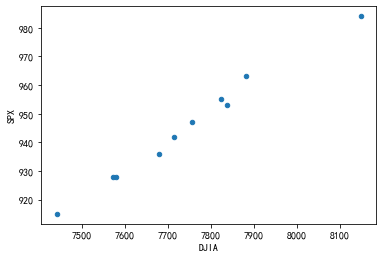

In [9]:
index_df.plot.scatter(x='DJIA',y='SPX')

# 第二节 回归分析

## 实验6-4 一元线性回归分析与预测

根据实验6-1的数据，建立用DJIA预测SPX的回归模型，并预测DJIA=8300时，SPX=？

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
x = index_df[['DJIA']]
y = index_df[['SPX']]
X = sm.add_constant(x) # 模型包含截距项，因而需要因变量矩阵增加值为1的常数列
X

,const,DJIA
Date,,
1,1.0,7715
2,1.0,7442
3,1.0,7581
4,1.0,7572
5,1.0,7881
6,1.0,7823
7,1.0,8149
8,1.0,7838
9,1.0,7756


In [18]:
sm_model = sm.OLS(y, X)
sm_result = sm_model.fit()
sm_result.params

const    166.082832
DJIA       0.100601
dtype: float64

回归直线方程为 Y = 166.082832 + 0.100601X

In [19]:
# 计算判定系数
sm_result.rsquared

0.9904333423452636

判定系数很大，说明模型拟合效果较好

In [20]:
# 进行一元线性预测
sm_result.predict([1,8300])

array([1001.07463095])

y预测当DJIA=8300时，SPX=1001.07463095

In [21]:
# 第二种方法，用statsmodels
sm_model = smf.ols(formula='SPX~DJIA' , data=index_df)
sm_result = sm_model.fit()
sm_result.params

Intercept    166.082832
DJIA           0.100601
dtype: float64

In [22]:
sm_result.rsquared

0.9904333423452636

In [23]:
sm_result.predict(pd.DataFrame([{'DJIA':8300}]))

0    1001.074631
dtype: float64

In [24]:
# 第三种方法，用sklearn
sk_model = LinearRegression()
sk_model.fit(x,y)
sk_model.intercept_[0]

166.08283214871528

In [25]:
sk_model.coef_[0][0]

0.10060142154182612

In [27]:
# 判定系数
sk_model.score(x,y)

0.9904333423452637

In [28]:
# 预测
sk_model.predict([[8300]])

array([[1001.07463095]])

## 实验6-5 多元线性回归分析和预测

Q是因变量，其他是自变量

In [29]:
pi_df = pd.read_excel('6-5.xlsx', index_col=0)
pi_df 

,Q,P,M,PAI,PBMac
Month,,,,,
1,1773,8.65,25500,10.55,1.25
2,1863,8.65,25600,10.45,1.35
3,1798,8.65,25700,10.35,1.55
4,1775,8.65,25970,10.30,1.05
5,1796,8.65,25970,10.30,0.95


In [33]:
pi_model = smf.ols(formula='Q ~ P + M + PAI + PBMac' , data=pi_df)
pi_result = pi_model.fit()
pi_result.params

Intercept     976.591186
P            8447.513762
M              -1.709659
PAI         -2652.159091
PBMac        -545.000000
dtype: float64

In [36]:
pi_result.summary()

D:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                 -0.682
Method:                 Least Squares   F-statistic:                    0.4594
Date:                Thu, 13 Aug 2020   Prob (F-statistic):              0.763
Time:                        10:22:41   Log-Likelihood:                -22.362
No. Observations:                   5   AIC:                             52.72
Df Residuals:                       1   BIC:                             51.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    976.5912    911.512      1.071      0.478   -1.06e+04    1.26e+04
P           8447.5138   7884.577      1.071      0.478   -9.17e+04    1.09e+05
M             -1.7097      1.632     -1.047      0.485     -22.453      19.033
PAI        -2652.1591   2545.723     -1.042      0.487    -3.5e+04    2.97e+04
PBMac       -545.0000    580.237     -0.939      0.520   -7917.610    6827.610
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.250
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.723
Skew:                           0.593   Prob(JB):                        0.696
Kurtosis:                       1.562   Cond. No.                     2.10e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.55e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
# 单相关系数
pi_df.corr()

,Q,P,M,PAI,PBMac
Q,1.000000,NaN,-0.285999,0.135738,0.343973
P,NaN,NaN,NaN,NaN,NaN
M,-0.285999,NaN,1.000000,-0.930529,-0.683977
PAI,0.135738,NaN,-0.930529,1.000000,0.376746
PBMac,0.343973,NaN,-0.683977,0.376746,1.000000


In [38]:
# 偏相关系数
pi_model_m = smf.ols(formula='Q ~ P + M + PAI + PBMac' , data=pi_df)
pi_result_m = pi_model_m.fit()
pi_result_m.params

Intercept     976.591186
P            8447.513762
M              -1.709659
PAI         -2652.159091
PBMac        -545.000000
dtype: float64

In [39]:
# Q与M的偏相关系数为
np.sqrt(pi_result.params[2] * pi_result_m.params[1])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan

这一部分由于数据不全以及未提及虚拟变量，多重共线性等较深入内容，这一部分暂写至此，日后进行补充整理

## 实验6-6 非线性回归分析

In [ ]:
建立指数回归模型 Y = β0 β1 ^ x

In [40]:
ma_df = pd.read_excel('6-6.xlsx')
ma_df

,Q,Month,Q1
0,33100,1,10.407289
1,47300,2,10.764266
2,69000,3,11.141862
3,102000,4,11.532728
4,150000,5,11.918391
5,220000,6,12.301383


In [42]:
# 先进性线性化得到线性模型： lnY = lnβ0 + lnβ1 X
ma_df.loc[:,'Q1'] = np.log(ma_df['Q'])
ma_df

,Q,Month,Q1
0,33100,1,10.407289
1,47300,2,10.764266
2,69000,3,11.141862
3,102000,4,11.532728
4,150000,5,11.918391
5,220000,6,12.301383


In [43]:
ma_model = smf.ols(formula='Q1 ~ Month' , data=ma_df)
ma_result = ma_model.fit()
ma_result.params

Intercept    10.011948
Month         0.380678
dtype: float64

In [45]:
np.power(np.e , ma_result.params[0])

22291.22329846538

In [46]:
np.power(np.e , ma_result.params[1])

1.4632756281161763

lnβ0 估计值为 10.011948

lnβ1 估计值为 0.380678

β0 估计值为 22291.22329846538

β1 估计值为 1.4632756281161763

模型为 Y = 22291.22329846538 × 1.4632756281161763^x

## 总结

这一章篇幅较短，还有很多详细的深入的内容可以介绍，日后慢慢完善。